# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt 
import sys

C:\Users\lpell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


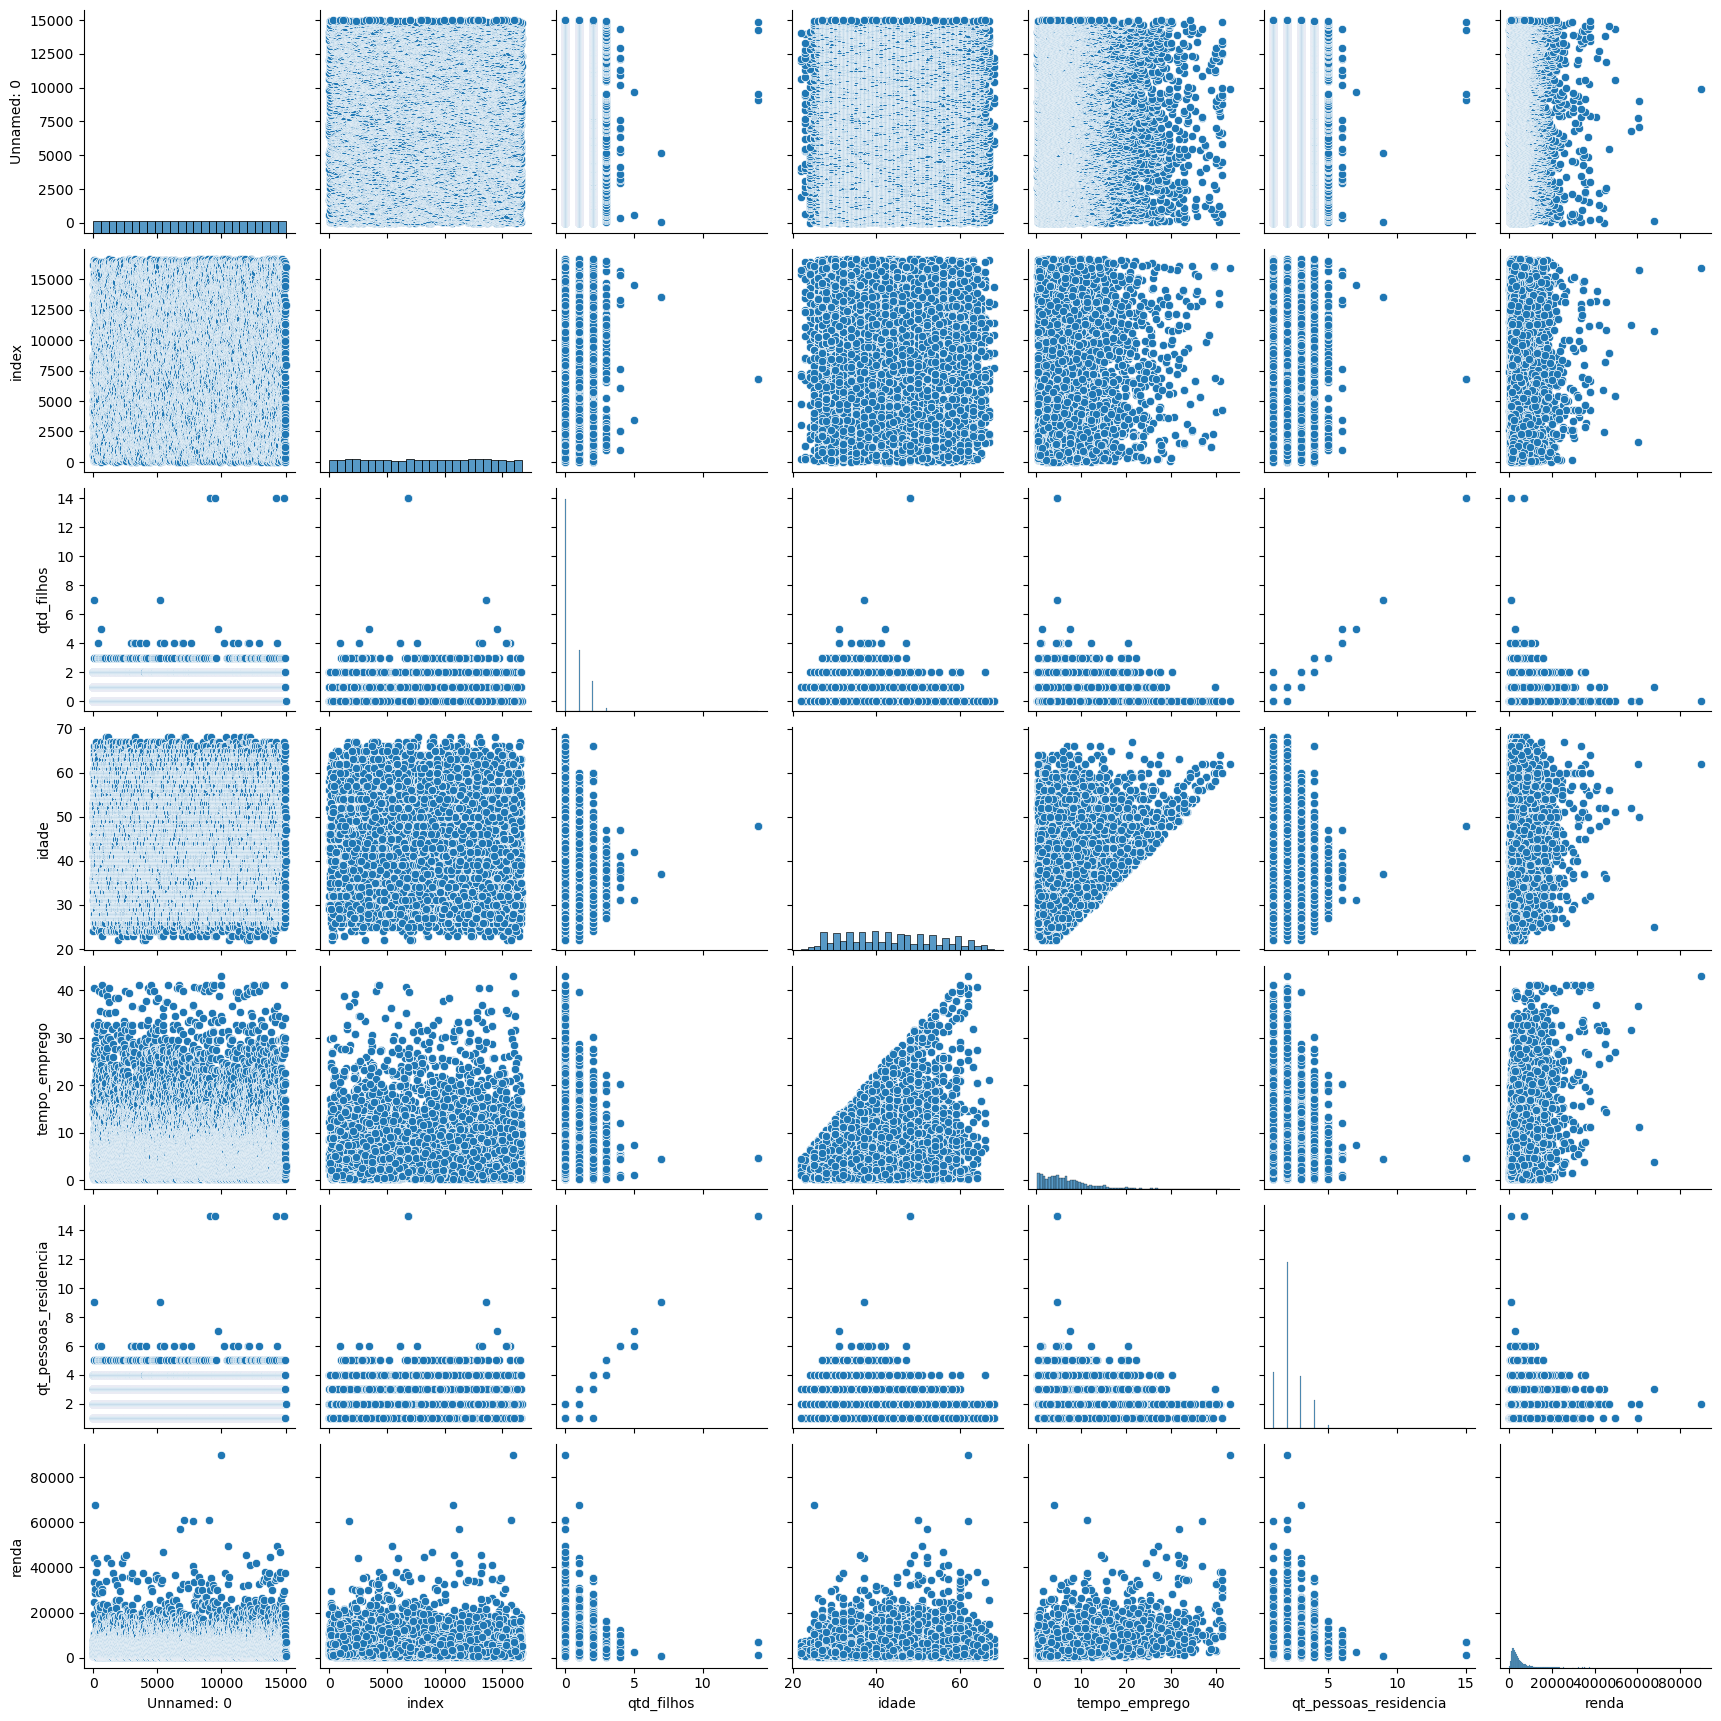

In [2]:
df = pd.read_csv('previsao_de_renda.csv')
df_numeric = df.select_dtypes(include=['number'])
corr = df_numeric.corr()
# Criar um gráfico de matriz de dispersão
sns.pairplot(df_numeric)
plt.show()

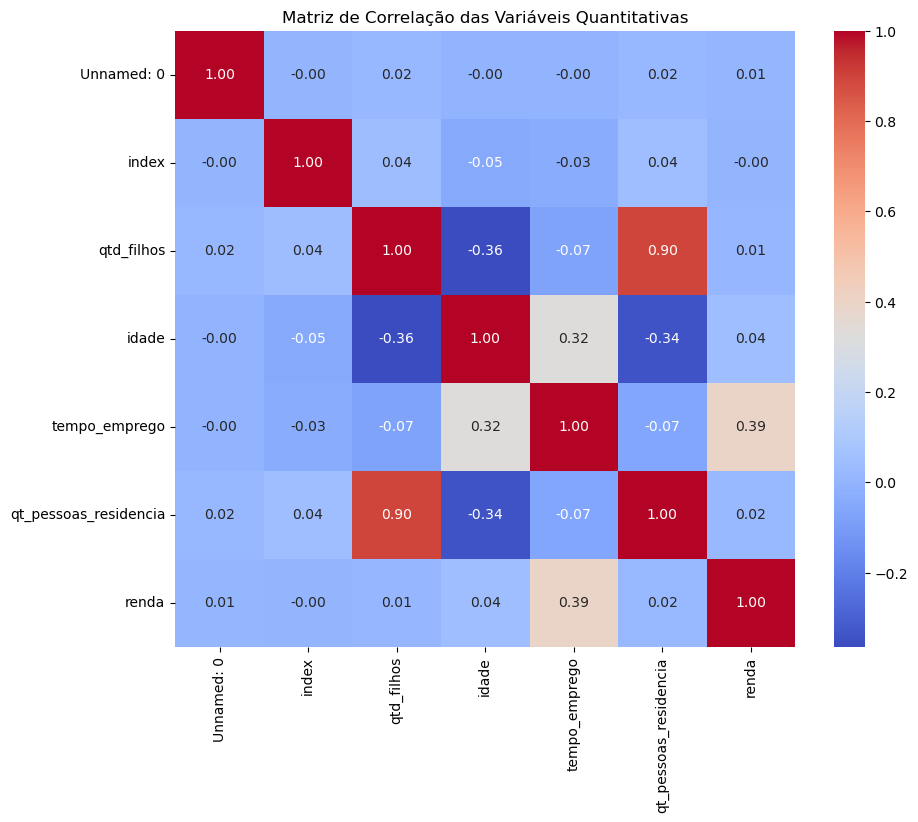

In [3]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis Quantitativas')
plt.show()

In [4]:
df.head(10)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
5,5,2015-01-01,7409,M,False,True,0,Assalariado,Superior incompleto,Casado,Casa,46,15.561644,2.0,False,5483.58
6,6,2015-01-01,6913,F,False,True,0,Assalariado,Secundário,Casado,Casa,51,5.046575,2.0,False,1947.99
7,7,2015-01-01,13047,M,True,True,0,Empresário,Secundário,Casado,Casa,24,1.591781,2.0,False,7781.51
8,8,2015-01-01,4529,F,False,False,0,Assalariado,Secundário,Casado,Casa,53,3.430137,2.0,False,5577.82
9,9,2015-01-01,14646,F,False,True,2,Servidor público,Secundário,União,Casa,34,7.219178,4.0,False,803.34


In [5]:
df_numeric.head(10)

,Unnamed: 0,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,8682,1,36,3.575342,3.0,3369.24
1,1,12830,0,42,0.860274,2.0,6096.14
2,2,2885,2,31,8.065753,4.0,5658.98
3,3,16168,0,50,1.208219,2.0,7246.69
4,4,12438,0,52,13.873973,2.0,4017.37
5,5,7409,0,46,15.561644,2.0,5483.58
6,6,6913,0,51,5.046575,2.0,1947.99
7,7,13047,0,24,1.591781,2.0,7781.51
8,8,4529,0,53,3.430137,2.0,5577.82
9,9,14646,2,34,7.219178,4.0,803.34


In [6]:
# Observando valores faltantes / missing
df.isna().any()

Unnamed: 0               False
data_ref                 False
index                    False
sexo                     False
posse_de_veiculo         False
posse_de_imovel          False
qtd_filhos               False
tipo_renda               False
educacao                 False
estado_civil             False
tipo_residencia          False
idade                    False
tempo_emprego             True
qt_pessoas_residencia    False
mau                      False
renda                    False
dtype: bool

**podemos observar alguns padrões interessantes:**
- **Correlação entre quantidade de filhos e idade:** Não parece haver uma correlação clara entre a quantidade de filhos e a idade das pessoas nos dados fornecidos. Isso sugere que a idade não está diretamente relacionada à decisão de ter filhos.

- **Distribuição de renda:** A distribuição de renda parece variada, com alguns valores altos e baixos. Isso pode indicar uma diversidade de situações econômicas entre os indivíduos representados nos dados.

- **Correlação entre tempo de emprego e renda:** Existe uma tendência de que pessoas com mais tempo de emprego tenham rendas mais altas, o que é consistente com a ideia de que a experiência profissional pode estar associada a salários mais altos.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

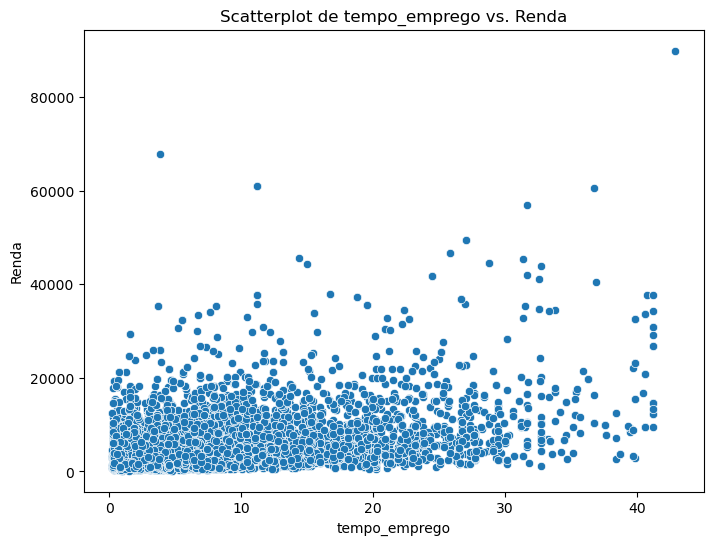

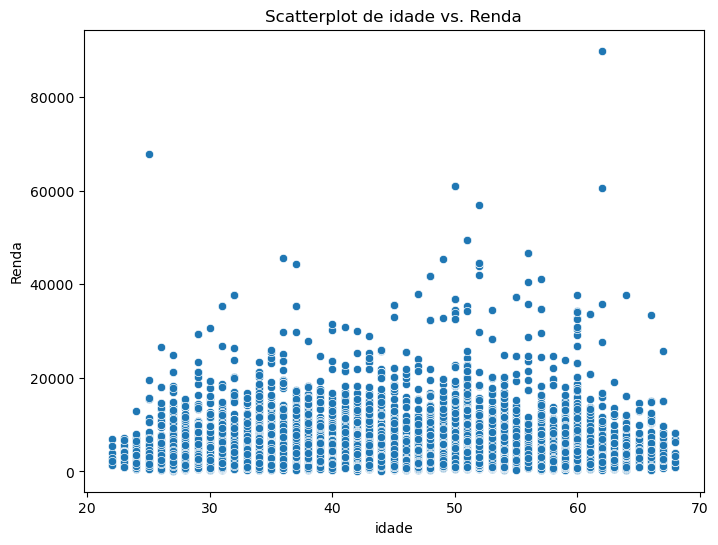

In [7]:
# Identificar as duas variáveis mais correlacionadas com renda
corr_with_renda = corr['renda'].sort_values(ascending=False)
top_correlations = corr_with_renda[1:3].index  # Excluindo a própria renda

# Criar o gráfico de dispersão para as duas variáveis mais correlacionadas com renda
for variable in top_correlations:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=variable, y='renda')
    plt.xlabel(variable)
    plt.ylabel('Renda')
    plt.title(f'Scatterplot de {variable} vs. Renda')
    plt.show()

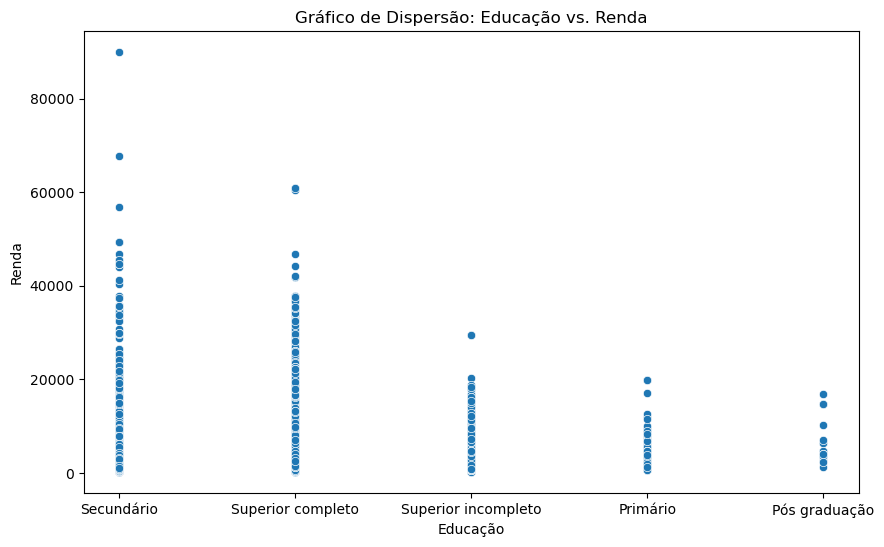

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='educacao', y='renda')
plt.title('Gráfico de Dispersão: Educação vs. Renda')
plt.xlabel('Educação')
plt.ylabel('Renda')
plt.show()

Os gráficos de dispersão revelam uma predominância de pessoas com apenas ensino secundário. Contrariando nossas expectativas, que sugerem que aqueles com ensino superior ou superior completo teriam salários mais altos, essa tendência não é evidente nos dados analisados.

Além disso, observa-se uma correlação direta entre idade, tempo de emprego e renda. Quanto mais tempo de trabalho, maior a renda, e à medida que a idade avança, a renda tende a acompanhar essa progressão, refletindo provavelmente a experiência acumulada ao longo da carreira.

3) Na sua opinião, há outliers na variável renda?

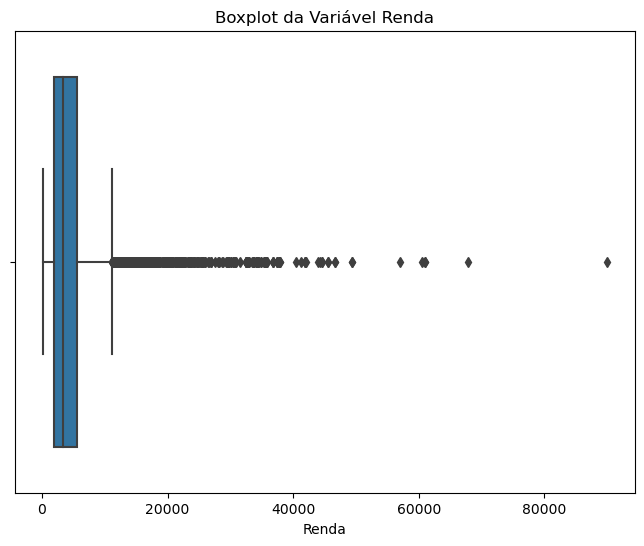

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['renda'])
plt.title('Boxplot da Variável Renda')
plt.xlabel('Renda')
plt.show()

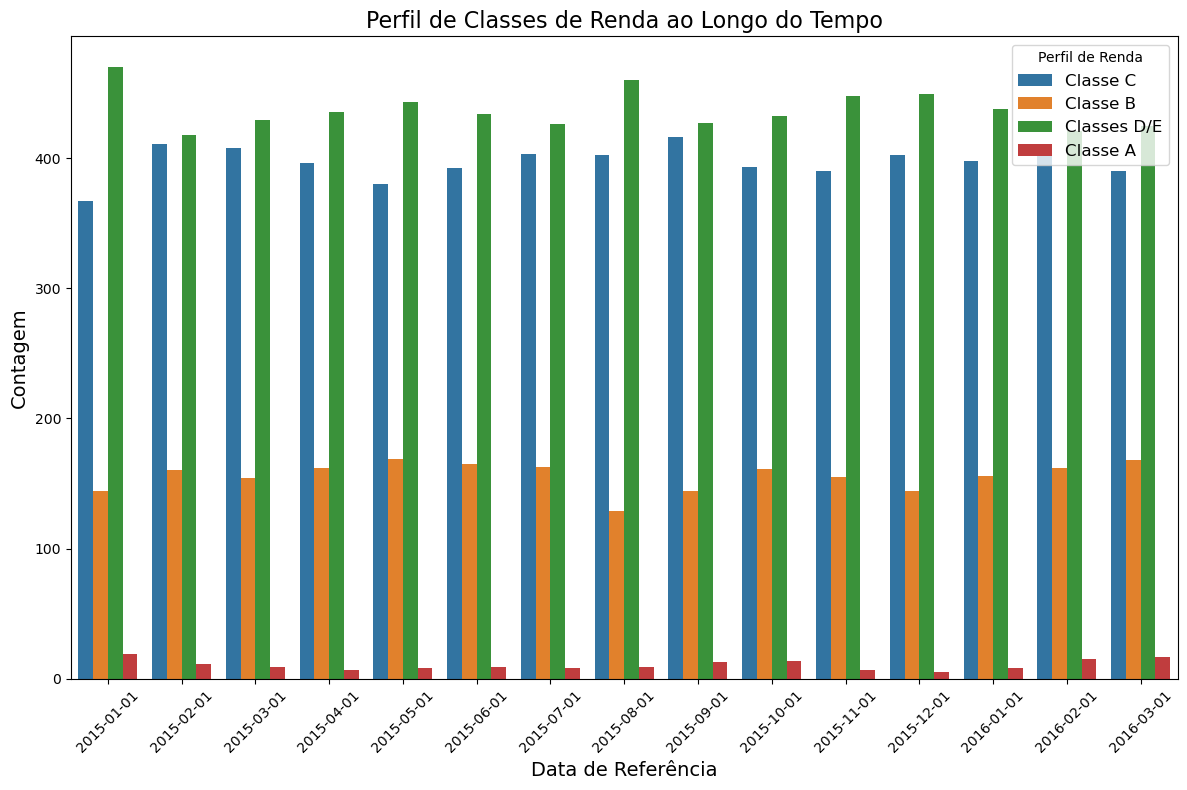

In [14]:
# Dividindo a renda em suas respectivas categorias
df.loc[(df['renda'] > 0) & (df['renda'] <= 2900), 'perfil_renda'] = 'Classes D/E'
df.loc[(df['renda'] > 2900) & (df['renda'] <=7100), 'perfil_renda'] = 'Classe C'
df.loc[(df['renda'] > 7100) & (df['renda'] <= 22000), 'perfil_renda'] = 'Classe B'
df.loc[(df['renda'] > 22000), 'perfil_renda'] = 'Classe A'
plt.figure(figsize=(12, 8))
# Perfil de classes ao longo do tempo
ax = sns.countplot(x='data_ref', hue='perfil_renda', data=df)
# Personalizando o título e os rótulos dos eixos
plt.title('Perfil de Classes de Renda ao Longo do Tempo', fontsize=16)
plt.xlabel('Data de Referência', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.legend(title='Perfil de Renda', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

<Figure size 1000x1000 with 0 Axes>

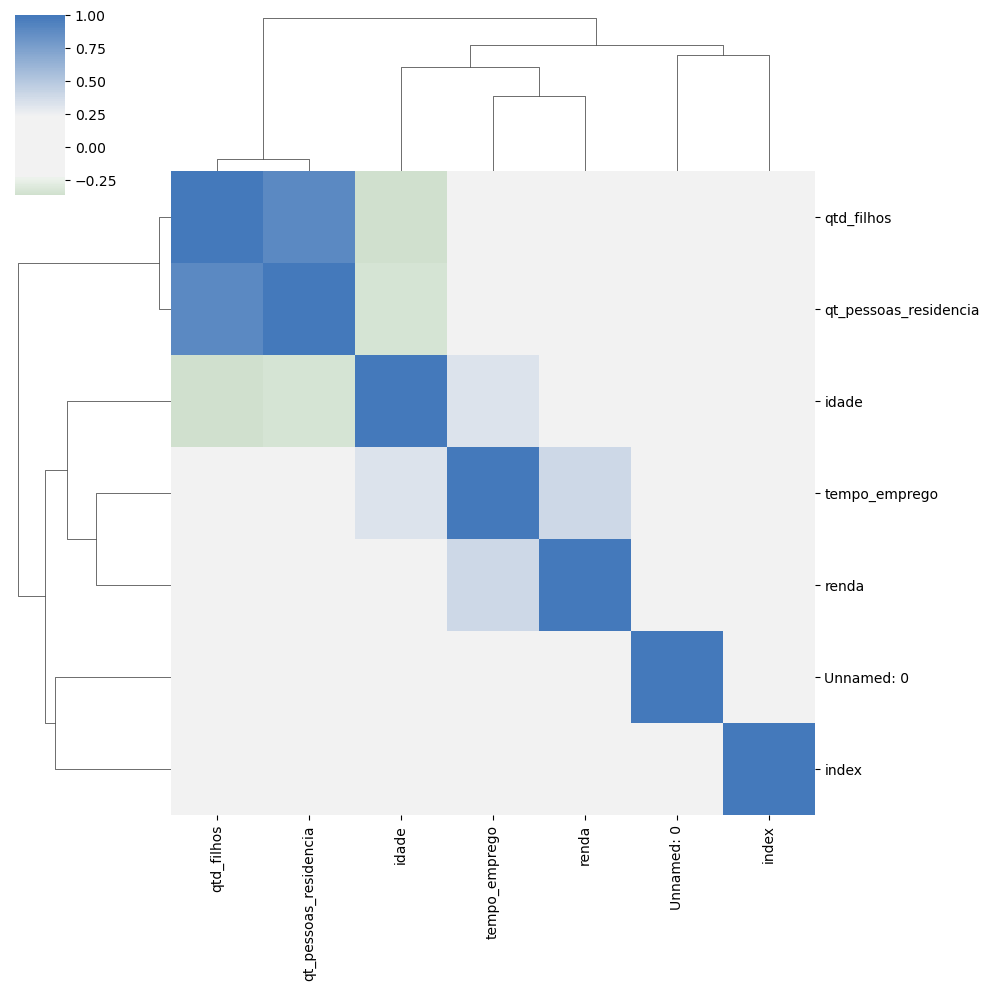

In [15]:
df_numeric = df.select_dtypes(include=['number'])
cmap = sns.diverging_palette(h_neg=125, h_pos=250, as_cmap=True, sep=60, center='light')
plt.figure(figsize=(10, 10))
sns.clustermap(df_numeric.corr(), figsize=(10, 10), center=0, cmap=cmap)
plt.show()

4) Calcule o logaritmo da variável renda e repita a sequência de análise

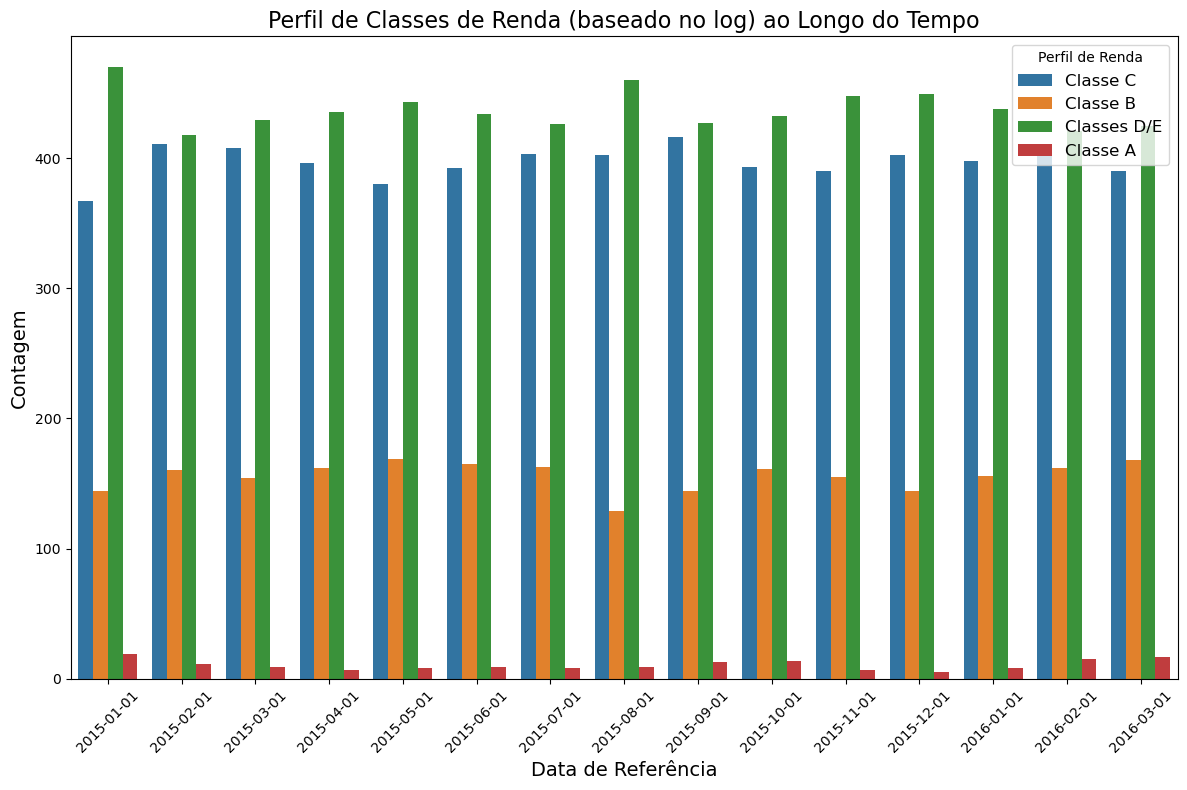

In [18]:
# Calcular o logaritmo da variável renda
df['log_renda'] = np.log(df['renda'] + 1)  # Adicionar 1 para evitar log(0)

# Dividindo a renda em suas respectivas categorias com base no log
df.loc[(df['log_renda'] > 0) & (df['log_renda'] <= np.log(2900 + 1)), 'perfil_renda'] = 'Classes D/E'
df.loc[(df['log_renda'] > np.log(2900 + 1)) & (df['log_renda'] <= np.log(7100 + 1)), 'perfil_renda'] = 'Classe C'
df.loc[(df['log_renda'] > np.log(7100 + 1)) & (df['log_renda'] <= np.log(22000 + 1)), 'perfil_renda'] = 'Classe B'
df.loc[(df['log_renda'] > np.log(22000 + 1)), 'perfil_renda'] = 'Classe A'

# Ajustando o tamanho da figura
plt.figure(figsize=(12, 8))

# Perfil de classes ao longo do tempo
ax = sns.countplot(x='data_ref', hue='perfil_renda', data=df)

# Personalizando o título e os rótulos dos eixos
plt.title('Perfil de Classes de Renda (baseado no log) ao Longo do Tempo', fontsize=16)
plt.xlabel('Data de Referência', fontsize=14)
plt.ylabel('Contagem', fontsize=14)

plt.legend(title='Perfil de Renda', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='idade', ylabel='log_renda'>

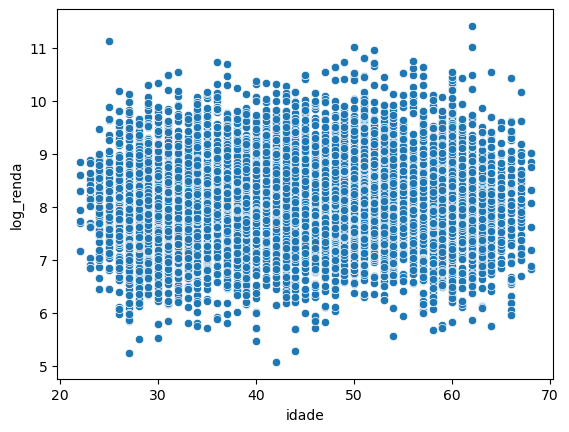

In [16]:
df_log = df.copy()
df_log['log_renda'] = np.log(df['renda'])

sns.scatterplot(x='idade', y='log_renda', data = df_log)

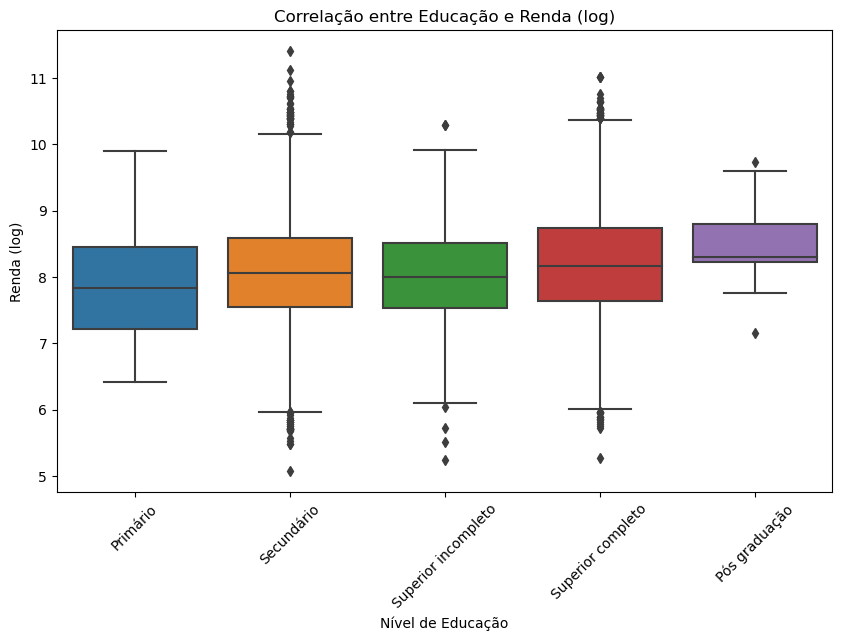

In [19]:
df['log_renda'] = np.log(df['renda'])

# Criar o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='educacao', y='log_renda', data=df, order=['Primário', 'Secundário',
                                                         'Superior incompleto', 'Superior completo',
                                                         'Pós graduação'])
plt.xticks(rotation=45)
plt.xlabel('Nível de Educação')
plt.ylabel('Renda (log)')
plt.title('Correlação entre Educação e Renda (log)')
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

O interessante foi a influência da educação na renda. Embora inicialmente não tenha sido evidente uma forte correlação entre os níveis de educação e renda, após a aplicação da transformação logarítmica, tornou-se mais clara uma relação entre essas variáveis. Isso ressalta a importância de considerar diferentes abordagens analíticas para obter insights mais robustos.

No geral, essa análise inicial fornece uma base sólida para investigações mais aprofundadas sobre as dinâmicas socioeconômicas subjacentes aos dados, destacando áreas de interesse para futuras análises e intervenções.